# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import chart_studio.plotly as py
import seaborn as sns
import plotly.express as px
%matplotlib inline
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, roc_curve,auc,roc_auc_score
from sklearn import tree

# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
init_notebook_mode(connected = True)

import cufflinks as cf

# Use Plotly locally
cf.go_offline()

Electrical powers system is growing in size and complexity in all sectors such as generation, transmission, distribution and load systems. Types of faults like short circuit condition in power system network results in severe economic losses and reduces the reliability of the electrical system.<br>
Electrical fault is an abnormal condition, caused by equipment failures such as transformers and rotating machines, human errors and environmental conditions. Theses faults cause interruption to electric flows, equipment damages and even cause death of humans, birds and animals.<br>
<b>Types of Faults</b><br>
Electrical fault is the deviation of voltages and currents from nominal values or states. Under normal operating conditions, power system equipment or lines carry normal voltages and currents which results in a safer operation of the system.<br>

But when fault occurs, it causes excessively high currents to flow which causes the damage to equipments and devices. Fault detection and analysis is necessary to select or design suitable switchgear equipments, electromechanical relays, circuit breakers and other protection devices.<br>

There are mainly two types of faults in the electrical power system:
1. Symmetrical Faults
2. Unsymmetrical Faults.

<b>Symmetrical faults</b><br>
These are very severe faults and occur infrequently in the power systems. These are also called as balanced faults and are of two types namely line to line to line to ground <b>(L-L-L-G)</b> and line to line to line <b>(L-L-L)</b>.<br>
Only 2-5 percent of system faults are symmetrical faults. If these faults occur, system remains balanced but results in severe damage to the electrical power system equipments. Analysis of these faults is easy and usually carried by per phase basis. Three phase fault analysis or information is required for selecting set-phase relays, rupturing capacity of the circuit breakers and rating of the protective switchgear.

<b>Unsymmetrical faults</b><br>
These are very common and less severe than symmetrical faults. There are mainly three types namely line to ground <b>(L-G)</b>, line to line <b>(L-L)</b> and double line to ground <b>(LL-G)</b> faults.<br>
Line to ground fault (L-G) is most common fault and 65-70 percent of faults are of this type.<br>
It causes the conductor to make contact with earth or ground. 15 to 20 percent of faults are double line to ground(LL-G) and causes the two conductors to make contact with ground. Line to line faults (L-L) occur when two conductors make contact with each other mainly while swinging of lines due to winds and 5- 10 percent of the faults are of this type.<br>
These are also called unbalanced faults since their occurrence causes unbalance in the system. Unbalance of the system means that that impedance values are different in each phase causing unbalance current to flow in the phases. These are more difficult to analyze and are carried by per phase basis similar to three phase balanced faults.<br>

# Read dataset

In [2]:
df_detect = pd.read_csv("detect_dataset.csv")
df_detect.head()

Output (S)          Ia        Ib          Ic        Va        Vb        Vc  \
0           0 -170.472196  9.219613  161.252583  0.054490 -0.659921  0.605431   
1           0 -122.235754  6.168667  116.067087  0.102000 -0.628612  0.526202   
2           0  -90.161474  3.813632   86.347841  0.141026 -0.605277  0.464251   
3           0  -79.904916  2.398803   77.506112  0.156272 -0.602235  0.445963   
4           0  -63.885255  0.590667   63.294587  0.180451 -0.591501  0.411050   

   Unnamed: 7  Unnamed: 8  
0         NaN         NaN  
1         NaN         NaN  
2         NaN         NaN  
3         NaN         NaN  
4         NaN         NaN

In [3]:
df_detect.sample(5)

Output (S)          Ia          Ib          Ic        Va        Vb  \
5560           0  -68.726891   90.207921  -19.052218 -0.285486 -0.266054   
1989           0  -64.690769   15.182683   45.741022  0.039226 -0.543787   
4358           0  -69.106747   51.934716   19.864721 -0.252520 -0.352407   
7496           1  683.494382 -826.568455  145.065828 -0.008647 -0.031569   
3025           1 -200.482725 -640.375945  -57.782595 -0.041038  0.296412   

            Vc  Unnamed: 7  Unnamed: 8  
5560  0.551541         NaN         NaN  
1989  0.504561         NaN         NaN  
4358  0.604927         NaN         NaN  
7496  0.040215         NaN         NaN  
3025 -0.255373         NaN         NaN

## Information about the dataset columns

In [4]:
df_detect.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12001 entries, 0 to 12000
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Output (S)  12001 non-null  int64  
 1   Ia          12001 non-null  float64
 2   Ib          12001 non-null  float64
 3   Ic          12001 non-null  float64
 4   Va          12001 non-null  float64
 5   Vb          12001 non-null  float64
 6   Vc          12001 non-null  float64
 7   Unnamed: 7  0 non-null      float64
 8   Unnamed: 8  0 non-null      float64
dtypes: float64(8), int64(1)
memory usage: 843.9 KB


## Drop the null columns

In [5]:
df_detect = df_detect.drop(columns=["Unnamed: 7", "Unnamed: 8"])

## Output 

In [6]:
df_detect["Output (S)"].value_counts()

0    6505
1    5496
Name: Output (S), dtype: int64

From above we can see that the problem is about binary classification.<br>
<b>Inputs</b> - Ia,Ib,Ic,Va,Vb,Vc<br>
<b>Outputs</b> - 0 (No-fault) or 1(Fault is present)

# Visualization

In [7]:
fig = px.line(df_detect, x = "Ib", y = "Vb", facet_col="Output (S)", color = "Output (S)")


for annotation in fig.layout.annotations:
    annotation.text = ""

for axis in fig.layout:
    if type(fig.layout[axis]) == go.layout.YAxis:
        fig.layout[axis].title.text = ''
    if type(fig.layout[axis]) == go.layout.XAxis:
        fig.layout[axis].title.text = ''
        


fig.update_layout(
    plot_bgcolor = "#ECECEC",
    title = "<b>Current and Voltage in line b</b>",
    title_font_size = 16,
    title_font_color = "black",
    title_pad_t = 5,
    title_pad_l = 20,
    yaxis = dict(
        title_text = "<b> Voltage </b>",
        titlefont = dict(size = 12)
    ),
    
    hoverlabel=dict(
        bgcolor="white",
        font_size=16,
        font_family="Rockwell"
    )
)

fig.update_yaxes(showticklabels = True, showline = True, linewidth = 2, linecolor = "black")
fig.update_xaxes(showticklabels = True, showline = True, linewidth = 2, linecolor = "black",
                title_text = "<b>Current</b>")



fig.show()

The above plot shows the relationship between the current and voltage under no fault (0) and faulty (1) conditions. We can see that in first graph there is nearly a smooth relationship between current and voltage but that is not the case in second graph. The variation between the two is completely incoherent.

In [8]:
x_a = df_detect[df_detect["Output (S)"] == 0]["Ia"]
y_a = df_detect[df_detect["Output (S)"] == 0]["Va"]

x_b = df_detect[df_detect["Output (S)"] == 0]["Ib"]
y_b = df_detect[df_detect["Output (S)"] == 0]["Vb"]

x_c = df_detect[df_detect["Output (S)"] == 0]["Ic"]
y_c = df_detect[df_detect["Output (S)"] == 0]["Vc"]


x_a1 = df_detect[df_detect["Output (S)"] == 1]["Ia"]
y_a1 = df_detect[df_detect["Output (S)"] == 1]["Va"]

x_b1 = df_detect[df_detect["Output (S)"] == 1]["Ib"]
y_b1 = df_detect[df_detect["Output (S)"] == 1]["Vb"]

x_c1 = df_detect[df_detect["Output (S)"] == 1]["Ic"]
y_c1 = df_detect[df_detect["Output (S)"] == 1]["Vc"]

fig = go.Figure()

fig = make_subplots(rows=3, cols=2,
                    subplot_titles=("No Fault", "Fault"))

fig.add_trace(go.Scatter(x = x_a, y = y_a, mode = "lines+markers", legendgroup = 'A',name = "A line",
                        line=dict(color='#EC2781', width=2)), row = 1, col = 1)
fig.add_trace(go.Scatter(x = x_b, y = y_b, mode = "lines+markers", legendgroup = 'B',name = "B line",
                        line=dict(color='#3C8DD6', width=2)), row = 2, col = 1)
fig.add_trace(go.Scatter(x = x_c, y = y_c, mode = "lines+markers", legendgroup = 'C',name = "C line",
                        line=dict(color='black', width=2)), row = 3, col = 1)
fig.add_trace(go.Scatter(x = x_a1, y = y_a1, mode = "lines+markers", legendgroup = 'A', showlegend = False,
                        line=dict(color='#EC2781', width=2)), row = 1, col = 2)
fig.add_trace(go.Scatter(x = x_b1, y = y_b1, mode = "lines+markers", legendgroup = 'B', showlegend = False,
                        line=dict(color='#3C8DD6', width=2)), row = 2, col = 2)
fig.add_trace(go.Scatter(x = x_c1, y = y_c1, mode = "lines+markers", legendgroup = 'C', showlegend = False,
                        line=dict(color='black', width=2)), row = 3, col = 2)



fig.update_layout(
    height=800, width=900,
    plot_bgcolor = "#ECECEC",
    title = "<b>Current and Voltage in line a, b, c under no fault condition</b>",
    title_font_size = 16,
    title_font_color = "black",
    title_pad_t = 5,
    title_pad_l = 20,
    
    hoverlabel=dict(
        bgcolor="white",
        font_size=16,
        font_family="Rockwell"
    ),
    annotations = list(fig.layout.annotations) + 
    [go.layout.Annotation(
            x=-0.07,
            y=0.5,
            font=dict(
                size=12
            ),
            text="<b> Votage </b>",
            textangle=-90,
            xref="paper",
            yref="paper"
        )
    ] +
    [go.layout.Annotation(
            x=0.5,
            y=-0.08,
            font=dict(
                size=12, color = 'black'
            ),
            showarrow=False,
            text="<b> Current </b>",
            textangle=-0,
            xref="paper",
            yref="paper"
        )
    ]
    
)

fig.update_yaxes(showticklabels = True, showline = True, linewidth = 2, linecolor = "black")
fig.update_xaxes(showticklabels = True, showline = True, linewidth = 2, linecolor = "black")




fig.show()

Above graphs shows us the relationship between current and voltage in different line A, B and C under faulty and non-faulty condition. 

In [9]:
cf

<module 'cufflinks' from '/Users/user/anaconda3/lib/python3.8/site-packages/cufflinks/__init__.py'>

In [10]:
df_detect_corr = df_detect[['Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc']].corr()
df_corr_round = df_detect_corr.round(3)
fig = ff.create_annotated_heatmap(
            z=df_detect_corr.to_numpy(),
            x=df_detect_corr.columns.tolist(),
            y=df_detect_corr.index.tolist(),
            zmax=1, zmin=-1,
            showscale=True,
            hoverongaps=True,
            colorscale='rdpu', 
            annotation_text=df_corr_round.to_numpy()
            )

fig.update_layout(title_text='<b>Correlation Heatmap</b>')
fig.show()

From above diagram we can see that the features doest not have positive corelation trend.

# Model Design

## Feature and label seperation

In [11]:
features = ['Ia', 'Ib','Ic','Va','Vb','Vc']

detection_data_X = df_detect[features]
detection_data_Y = df_detect['Output (S)']

## Splitting data

In [12]:
X_train, X_test, y_train, y_test = train_test_split(detection_data_X, detection_data_Y, test_size=0.3, 
                                                    random_state=101)

# Building classifier without tuning data

## Defining model

In [13]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train,y_train)
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [14]:
def plot_feature_importance(model):
    fig = px.bar(x = df_detect.columns[1:], y = model.feature_importances_)
    fig.update_layout(
        plot_bgcolor = "#ECECEC",
        title = "<b>Feature Importance</b>",
        title_font_size = 16,
        title_font_color = "black",
        title_pad_t = 5,
        title_pad_l = 20,
        yaxis = dict(
            title_text = "<b> Feature importance </b>",
            titlefont = dict(size = 12)
        ),
        xaxis = dict(
            title_text = "<b> Feature </b>",
            titlefont = dict(size = 12)
        )
    )
    fig.show()

In [15]:
plot_feature_importance(clf)

## Calculating model accuracy

In [16]:
y_train_acc = accuracy_score(y_train,y_train_pred)
y_test_acc = accuracy_score(y_test,y_test_pred)

In [17]:
print("Train Accuracy: ", y_train_acc)
print("Test Accuracy: ", y_test_acc)

Train Accuracy:  1.0
Test Accuracy:  0.9944459872257706


We can see that the train and test accuracy does not have much difference. Thus the value take by model by default works for our model.

## Visualizing Tree

In [18]:
def tree_plot(model_name):
    plt.figure(figsize=(20,20))
    features = df_detect.columns
    classes = ['Not Fault','Fault']
    tree.plot_tree(model_name,feature_names=features,class_names=classes,filled=True)
    plt.show()

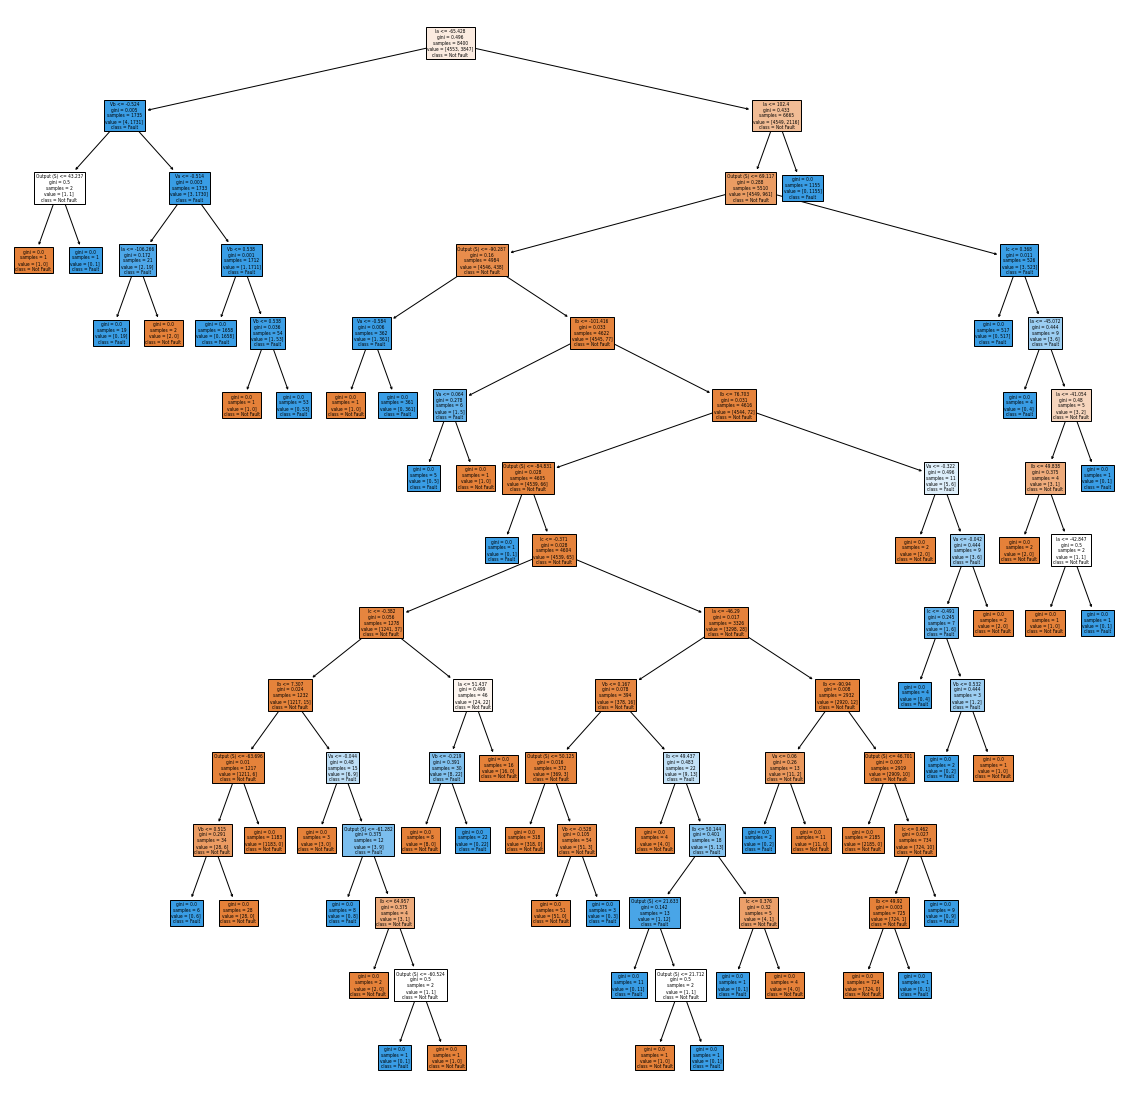

In [19]:
tree_plot(clf)

### Parameters in tree diagram:
1. Feature which provide maximumn information gain.
2. Branches represent the decision rules.
3. Each leaf node represents the outcome.
4. Decision nodes are used to make any decision and have multiple branches.
5. Leaf nodes are the output of those decisions and do not contain any further branches.






## Classification Report

In [20]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1952
           1       1.00      0.99      0.99      1649

    accuracy                           0.99      3601
   macro avg       0.99      0.99      0.99      3601
weighted avg       0.99      0.99      0.99      3601



The classification report is about key metrics in a classification problem.<br>

You'll have precision, recall, f1-score and support for each class you're trying to find.<br>

1. The recall means "how many of this class you find over the whole number of element of this class".<br>

2. The precision will be "how many are correctly classified among that class".<br>

3. The f1-score is the harmonic mean between precision & recall.<br>

4. The support is the number of occurence of the given class in your dataset.<br>

## Confusion Matrix

In [21]:
def plot_confusionmatrix(y_train_pred,y_train,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train)
    x = ["Not Fault", "Fault"]
    y = ["Not Fault", "Fault"]
    #colorscale = [[0, 'navy'], [1, 'plum']]
    font_colors = ['black', 'white']
    fig = ff.create_annotated_heatmap(cf, x = x, y = y, colorscale='rdpu', font_colors=font_colors)
    fig.update_layout(
    xaxis = dict(
        title_text = "<b> Predicted </b>",
        titlefont = dict(size = 12)
    ),
    yaxis = dict(
        title_text = "<b> Actual </b>",
        titlefont = dict(size = 12)
    )
    )
    fig.show()

In [22]:
plot_confusionmatrix(y_train_pred,y_train,dom='Train')

Train Confusion matrix


In [23]:
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

Test Confusion matrix


## ROC Curve

In [24]:
dt_probs = clf.predict_proba(X_test)[:,1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test,dt_probs)
auc_score_dt = auc(fpr_dt,tpr_dt)
auc_score_dt

0.994218117786239

About FPR and TPR in decision tree

In [25]:
def roc_plot(fpr, tpr):
    fig = px.line(x = fpr, y = tpr)
    fig.add_shape(type='line', line=dict(color="black",width=3, dash = "dash"),x0=0, x1=1, y0=0, y1=1)
    fig.update_layout(
    plot_bgcolor = "#ECECEC",
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})' ,
    title_font_size = 16,
    title_font_color = "black",
    title_pad_t = 5,
    title_pad_l = 20,
    yaxis = dict(
        title_text = "<b> True Positive Rate </b>",
        titlefont = dict(size = 12)
    ),
    xaxis = dict(
        title_text = "<b> False Positive Rate </b>",
        titlefont = dict(size = 12)))

    fig.show()

In [26]:
roc_plot(fpr_dt, tpr_dt)

# Pre pruning techniques

Pre pruning is nothing but stoping the growth of decision tree on an early stage. For that we can limit the growth of trees by setting constrains. We can limit parameters like max_depth , min_samples etc.<br>

An effective way to do is that we can grid search those parameters and choose the optimum values that gives better performace on test data.<br>

As of now we will control these parameters<br>

max_depth: maximum depth of decision tree<br>
min_sample_split: The minimum number of samples required to split an internal node:<br>
min_samples_leaf: The minimum number of samples required to be at a leaf node.<br>

## Hyper Parameter Tuning

In [27]:
from sklearn.model_selection import  GridSearchCV
params = {'max_depth': [2,4,6,8,10,12],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [1,2]}

clf = DecisionTreeClassifier()
gcv = GridSearchCV(estimator=clf,param_grid=params)
grid_cv = gcv.fit(X_train,y_train)

In [28]:
print("The best parameter selected are: ", grid_cv.best_estimator_)

The best parameter selected are:  DecisionTreeClassifier(max_depth=12, min_samples_split=3)


In [29]:
print("The best parameters selected are: ",grid_cv.best_params_)

The best parameters selected are:  {'max_depth': 12, 'min_samples_leaf': 1, 'min_samples_split': 3}


## Fitting best parameter

In [30]:
model_pre = gcv.best_estimator_
model_pre.fit(X_train,y_train)
y_train_pred = model_pre.predict(X_train)
y_test_pred = model_pre.predict(X_test)

In [31]:
print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')

Train score 0.9992857142857143
Test score 0.9936128853096362


In [32]:
plot_feature_importance(model_pre)

## Visualizing tree after pre pruning

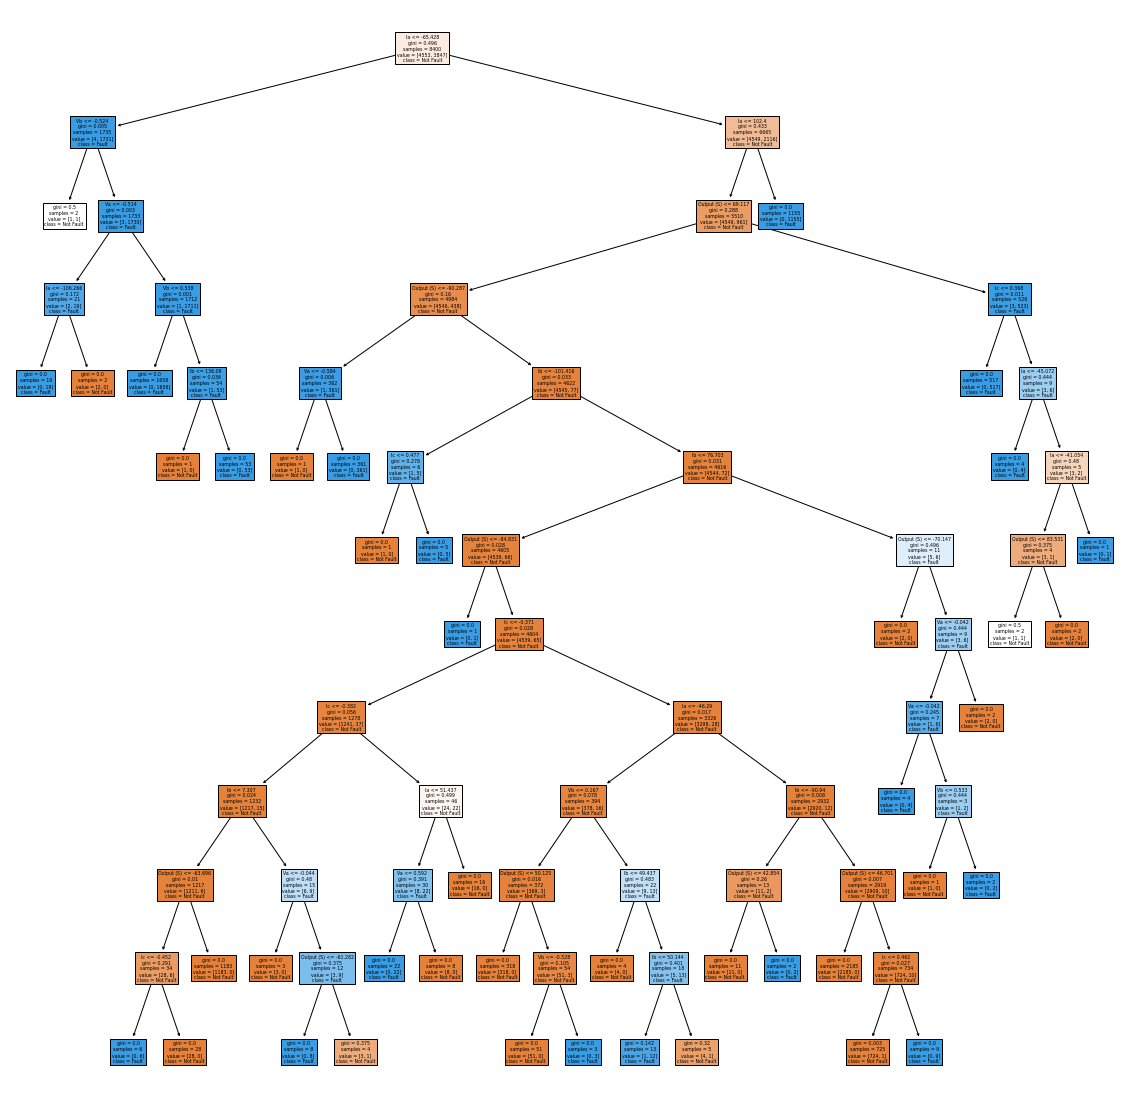

In [33]:
tree_plot(model_pre)

## Classification Report

In [34]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1952
           1       1.00      0.99      0.99      1649

    accuracy                           0.99      3601
   macro avg       0.99      0.99      0.99      3601
weighted avg       0.99      0.99      0.99      3601



## Confusion Matrix

In [35]:
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

Train Confusion matrix


Test Confusion matrix


## ROC Curve

In [36]:
pre_dt_probs = model_pre.predict_proba(X_test)[:,1]
fpr_pre_dt, tpr_pre_dt, thresholds_pre_dt = roc_curve(y_test,pre_dt_probs)
auc_score_pre_dt = auc(fpr_pre_dt,tpr_pre_dt)
auc_score_pre_dt


0.9948310699977134

In [37]:
roc_plot(fpr_pre_dt, tpr_pre_dt)

# Post pruning techniques
<b>Cost Complexity Pruning</b>
Decision trees can easily overfit. One way to avoid it is to limit the growth of trees by setting constrains. We can limit parameters like max_depth , min_samples etc. But a most effective way is to use post pruning methods like cost complexity pruning. This helps to improve test accuracy and get a better model.<br>

Cost complexity pruning is all about finding the right parameter for alpha.We will get the alpha values for this tree and will check the accuracy with the pruned trees.<br>

In [38]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.00000000e+00 8.92857143e-05 8.92857143e-05 1.02040816e-04
 1.07142857e-04 1.09890110e-04 1.18978082e-04 1.19047619e-04
 1.90476190e-04 1.90476190e-04 1.97727160e-04 1.98412698e-04
 2.22634508e-04 2.34021365e-04 2.37437516e-04 2.37766831e-04
 3.39285714e-04 3.54262673e-04 4.02930403e-04 4.27988678e-04
 7.10764174e-04 7.34917332e-04 8.95167427e-04 1.03636653e-03
 7.68556110e-02 9.30716471e-02 1.53307498e-01]


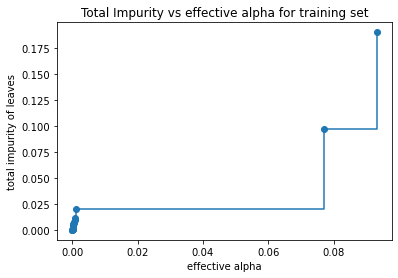

In [39]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set");

In [40]:
# For each alpha we will append our model to a list
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

In [41]:
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.15330749810824518


We will remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node.



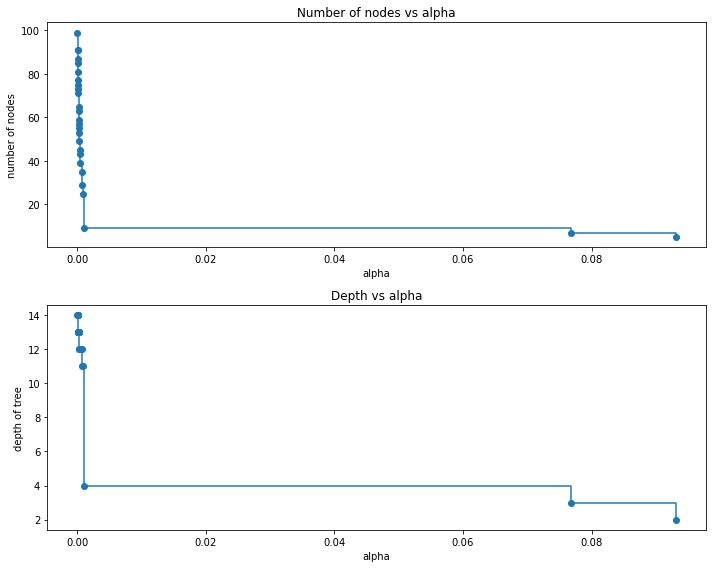

In [42]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,8))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

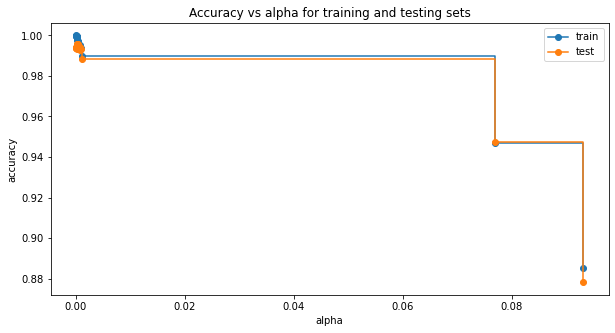

In [43]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

As the value of alphs is increased, more of the tree is pruned. This results in increase in impurity at leaf node. As a result the accuracy decreases.

## Fitting the model

In [44]:
model_post = DecisionTreeClassifier(random_state=0,ccp_alpha=0.001)
model_post.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.001, random_state=0)

In [45]:
y_train_pred = model_post.predict(X_train)
y_test_pred = model_post.predict(X_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')

Train score 0.9935714285714285
Test score 0.9930574840322133


In [46]:
plot_feature_importance(model_post)

## Tree Visualization

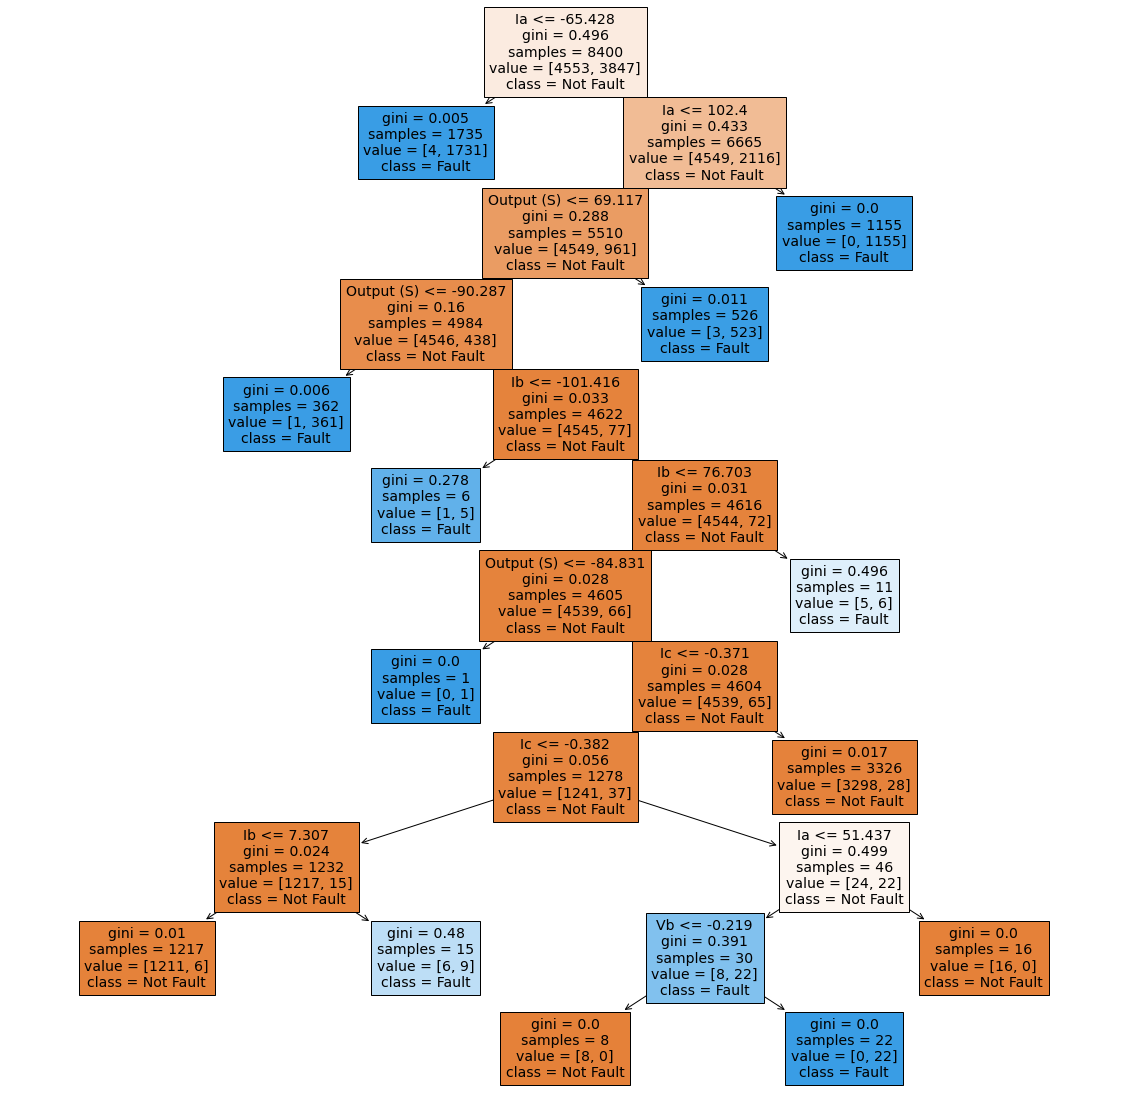

In [47]:
tree_plot(model_post)

## Classification Report

In [48]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1952
           1       1.00      0.99      0.99      1649

    accuracy                           0.99      3601
   macro avg       0.99      0.99      0.99      3601
weighted avg       0.99      0.99      0.99      3601



## Confusion Matrix

In [49]:
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

Train Confusion matrix


Test Confusion matrix


## ROC Curve

In [50]:
post_dt_probs = model_post.predict_proba(X_test)[:,1]
fpr_post_dt, tpr_post_dt, thresholds_post_dt = roc_curve(y_test,post_dt_probs)
auc_score_post_dt = auc(fpr_post_dt,tpr_post_dt)
auc_score_post_dt

0.9945149631172394

In [51]:
roc_plot(fpr_post_dt, tpr_post_dt)